In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import os

import params_image as params
import model_image as model
from IPython.display import display

In [2]:
def convert_images(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            image_path = os.path.join(directory, filename)
            img = Image.open(image_path).convert('RGB')
            jpg_path = os.path.splitext(image_path)[0] + ".jpg"
            img.save(jpg_path, "JPEG", quality = 100)
            os.remove(image_path)

convert_images('../../dataset\Pokemon\images')

c:\Users\matty\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [3]:
class Pokemon_dataset(Dataset):
    def __init__(self, df, file_path, transforms = None):
        self.df = df
        self.transforms = transforms
        self.image_list = []
        for name in tqdm(df['Name'].values):
            image = Image.open(file_path + name + '.jpg')
            self.image_list.append(image)

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        image = self.image_list[idx]
        if self.transforms:
            image = self.transforms(image)
        return image

In [8]:
transform = transforms.Compose([
    transforms.Resize((params.image_size, params.image_size)),
    transforms.ToTensor(),
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
df = pd.read_csv('../../dataset/Pokemon/pokemon.csv')
dataset = Pokemon_dataset(df, '../../dataset/Pokemon/images/', transform)
train_data, test_data = train_test_split(dataset, test_size=0.2)
train_loader = DataLoader(train_data, batch_size = params.batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size = params.batch_size, shuffle=True)

100%|██████████| 809/809 [00:00<00:00, 19172.96it/s]


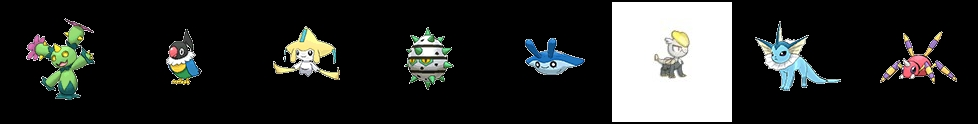

In [9]:
imgs = next(iter(train_loader))
imgs = torchvision.utils.make_grid(imgs)
img = transforms.ToPILImage()(imgs)
display(img)